Here we grid AHN point data to a regular grid

In [1]:
%matplotlib inline
# import packages
from hydrotools import gis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

As an example let's make a function that calculates some data based on x, y values as input. We use the function used in scipy.interpolate.griddata as example. And let's see what it looks like if we evaluate this function over a nice grid.

In [36]:
# for testing, only a subset of points is used
nr_of_points = 1000000
# read files
xyzfile = r'c:\temp\loenen_xyz_4kant111 - Copy.xyz'
xyz_orig = pd.read_csv(xyzfile, delimiter = ' ')
xyz_list = xyz_orig.values

# get rid of missings
idx = xyz_list[:, -1] > -10
xyz_list = xyz_list[idx]


# make a set of points (x, y)
xy = xyz_list[:, 0:2]

z = xyz_list[:, 2]
# span some x and y axis from minimum and maximum of points
xax = np.linspace(xy[0:nr_of_points, 0].min(), xy[0:nr_of_points, 0].max(), 100)
yax = np.linspace(xy[0:nr_of_points, 1].min(), xy[0:nr_of_points, 1].max(), 100)
xy[0:nr_of_points]

array([[ 197999.11884809,  459541.49609001],
       [ 197999.61884809,  459541.49609001],
       [ 198000.11884809,  459541.49609001],
       ..., 
       [ 198497.11884809,  459196.49609001],
       [ 198497.61884809,  459196.49609001],
       [ 198498.11884809,  459196.49609001]])

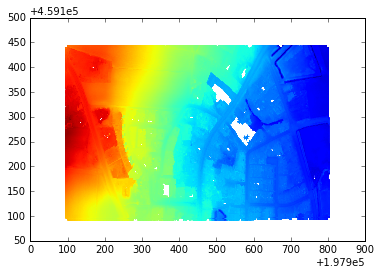

In [37]:
# let's have a look at (some of ) the  point records

plt.scatter(xy[0:nr_of_points, 0], xy[0:nr_of_points, 1], marker='+', s=15, c=z[0:nr_of_points], cmap=plt.cm.jet)



Let's now assume we only know the values in the grid above in a few (say, 20) points and let's interpolate these with gdal_grid

Interpolating data-block y: 0 -- 100; x: 0 -- 100


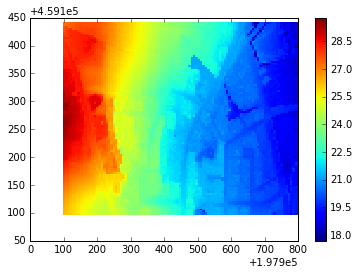

In [38]:
# now let's interpolate with nearest neighbour. After interpolation, we will read back the generated file
filename = 'test.tif'
gis.gdal_grid(filename, xy[0:nr_of_points], z[0:nr_of_points], (yax, xax), method='nearest', zlib=True)

x, y, nearest, fill = gis.gdal_readmap(filename, 'GTiff')
xi, yi = np.meshgrid(x, y)
plt.pcolormesh(xi, yi, nearest)
plt.colorbar()


what if we use a higer resolution and linear interpolation?

In [56]:
# span some x and y axis from minimum and maximum of points
xax = np.linspace(xy[0:nr_of_points, 0].min(), xy[0:nr_of_points, 0].max(), 2000)
yax = np.linspace(xy[0:nr_of_points, 1].min(), xy[0:nr_of_points, 1].max(), 2000)

gis.gdal_grid(filename, xy, z, (yax, xax), method='linear',
              chunksizes=(300, 300), chunk_overlap=(50, 50), zlib=True)



Interpolating data-block y: 0 -- 300; x: 0 -- 300
Interpolating data-block y: 0 -- 300; x: 300 -- 600
Interpolating data-block y: 0 -- 300; x: 600 -- 900
Interpolating data-block y: 0 -- 300; x: 900 -- 1200
Interpolating data-block y: 0 -- 300; x: 1200 -- 1500
Interpolating data-block y: 0 -- 300; x: 1500 -- 1800
Interpolating data-block y: 0 -- 300; x: 1800 -- 2000
Interpolating data-block y: 300 -- 600; x: 0 -- 300
Interpolating data-block y: 300 -- 600; x: 300 -- 600
Interpolating data-block y: 300 -- 600; x: 600 -- 900
Interpolating data-block y: 300 -- 600; x: 900 -- 1200
Interpolating data-block y: 300 -- 600; x: 1200 -- 1500
Interpolating data-block y: 300 -- 600; x: 1500 -- 1800
Interpolating data-block y: 300 -- 600; x: 1800 -- 2000
Interpolating data-block y: 600 -- 900; x: 0 -- 300
Interpolating data-block y: 600 -- 900; x: 300 -- 600
Interpolating data-block y: 600 -- 900; x: 600 -- 900
Interpolating data-block y: 600 -- 900; x: 900 -- 1200
Interpolating data-block y: 600 -

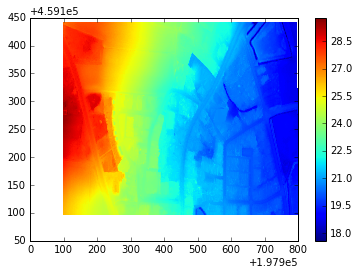

In [58]:
x, y, linear, fill = gis.gdal_readmap(filename, 'GTiff')

# xi, yi = np.meshgrid(x, y)
linear_ma = np.ma.masked_equal(linear, fill)
plt.pcolormesh(xi, yi, linear_ma)
plt.colorbar()